In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import numpy as np

import trueq as tq
import trueq.compilation as tqc
from trueq.algorithms import qft

In [3]:
cycle1 = {0: tq.Gate.h}
cycle2 = {(0, 1): tq.Gate.cx}
cycle3 = {2: tq.Gate.h}
cycle4 = {(2, 3): tq.Gate.cx}

circuit = tq.Circuit([cycle1, cycle2, cycle3, cycle4])
circuit.measure_all()
circuit.draw(interactive=False)

DisplayWrapper(<svg xmlns="http://w...)

In [4]:
rc_circuits = tq.randomly_compile(circuit, compile_paulis=True)

# Select one circuit from the collection
rc_circuit = rc_circuits[0]

rc_circuit.draw(interactive=False)

DisplayWrapper(<svg xmlns="http://w...)

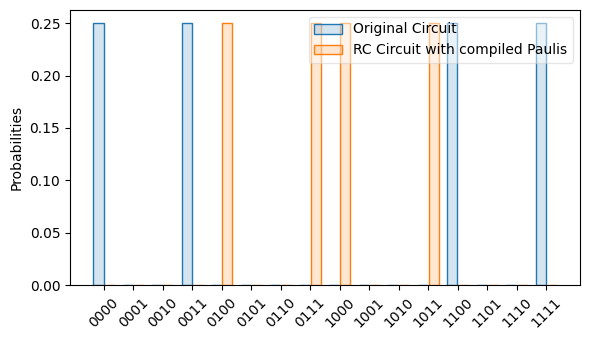

In [5]:
# instantiate a simulator and run the original and the RC circuit
sim = tq.Simulator()

original_result = sim.sample(circuit, n_shots=np.inf)
rc_result = sim.sample(rc_circuit, n_shots=np.inf)

tq.visualization.plot_results(
    original_result,
    rc_result,
    labels=["Original Circuit", "RC Circuit with compiled Paulis"],
)

In [6]:
rc_circuit.key

Key(compiled_pauli=Weyls('XZYX'), protocol='RC', twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2))

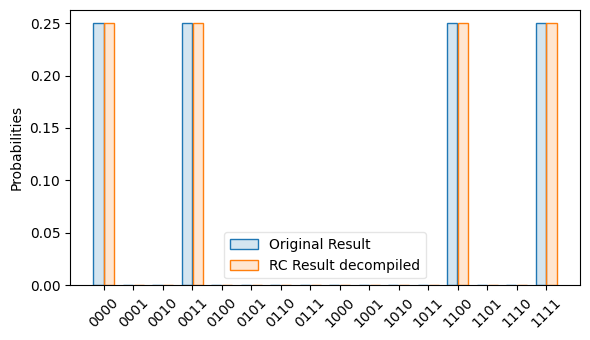

In [7]:
compiled_paulis = rc_circuit.key.compiled_pauli

rc_result_decompiled = rc_result.decompiled_results(compiled_paulis)

tq.visualization.plot_results(
    original_result,
    rc_result_decompiled,
    labels=["Original Result", "RC Result decompiled"],
)

In [8]:
# run all RC circuits on the simulator
sim.run(rc_circuits)

# average the decompiled results
rc_circuits.sum_results(decompile_paulis=True).normalized()

Results({'1111': 0.24933333333333332, '1100': 0.26, '0011': 0.244, '0000': 0.24666666666666665})

In [9]:
# define a QFT circuit on 4 qubits
qft_circuit = qft(range(4))
# display the output
qft_circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [10]:
rc_circuits = tq.randomly_compile(qft_circuit, entangler=tq.Gate.cx)

# display the first circuit in this collection:
rc_circuits[0].draw()

DisplayWrapper(<svg xmlns="http://w...)

In [11]:
entangler = tq.Gate.cx
# Define a pass for the compiler that specifies which two-qubit gates to use
entangler_pass = tqc.Native2Q([tq.config.GateFactory.from_matrix("CX", entangler.mat)])
# define the compiler
compiler = tqc.Compiler(passes=[entangler_pass, tqc.Merge()])

# compile the QFT circuit
compiled_qft_circuit = compiler.compile(qft_circuit)
# display the resulting circuit
compiled_qft_circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [12]:
rc_circuits = tq.randomly_compile(compiled_qft_circuit)
# display a sample circuit from this collection:
rc_circuits[0].draw()

DisplayWrapper(<svg xmlns="http://w...)

In [13]:
circuit = tq.Circuit(
    [
        {0: tq.Gate.h, 3: tq.Gate.h},
        {(0, 1): tq.Gate.cx},
        {(1, 2): tq.Gate.cx},
        {(2, 3): tq.Gate.cx},
    ]
)
circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [14]:
rc_cycle_compiler = tqc.Compiler(
    passes=[
        # specify a pass to mark hard cycles:
        tqc.MarkCycles(),
        # specify the main RC pass:
        tqc.RCCycle(),
        # merge single-qubit cycles together:
        tqc.Merge(),
    ]
)
# generate one randomly compiled circuit using this compiler:
rc_cycle_circuit = rc_cycle_compiler.compile(circuit)
rc_cycle_circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [15]:
rc_local_compiler = tqc.Compiler(
    passes=[
        # specify a pass to mark hard cycles:
        tqc.MarkCycles(),
        # specify the main RC pass:
        tqc.RCLocal(),
        # merge single-qubit cycles together:
        tqc.Merge(),
    ]
)
# generate one randomly compiled circuit using this compiler:
rc_local_circuit = rc_local_compiler.compile(circuit)
rc_local_circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)